In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, cross_val_predict

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
train=pd.read_csv('Dataset/Train.csv')
test=pd.read_csv('Dataset/Test.csv')
train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  ...  Compensation_and_Benefits  Work_Life_balance  \
0                     4  ...                      type2                3.0   
1                     4  ...                      type2                4.0   
2                     3  ...                      type2                1.0   
3                     3  ...                      type2                1.0   
4                     4  ...                      type3                3.0   

   VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  
0     4  0.7516  1.8688   2.0     4     5     3          0.1841  
1     3 -0.9612 -0.4537   2.0     3     5     3          0.0670  
2     4 -0.9612 -0.4537   3.0     3     8     3          0.0851  
3     3 -1.8176 -0.4537   NaN     3     7     3          0.0668  
4     1  0.7516 -0.4537   2.0     2     8     2          0.1827  

[5 rows x 24 columns]

In [3]:
train.shape

(7000, 24)

In [4]:
test.shape

(3000, 23)

In [5]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [6]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [29]:
train['Age'] = train['Age'].fillna(39.622799).astype(np.int64)
train['Age'] = train['Age'].fillna(39.797816).astype(np.int64)

train['Time_of_service'] = train['Time_of_service'].fillna(39.622799).astype(np.int64)
test['Time_of_service'] = test['Time_of_service'].fillna(39.622799).astype(np.int64)

train['Pay_Scale'] = train['Pay_Scale'].fillna(6.006294).astype(np.int64)
test['Pay_Scale'] = test['Pay_Scale'].fillna(3.060727).astype(np.int64)

train['Work_Life_balance'] = train['Work_Life_balance'].fillna(2.387895).astype(np.int64)
test['Work_Life_balance'] = test['Work_Life_balance'].fillna(2.380968).astype(np.int64)

train['VAR2'] = train['VAR2'].fillna(-0.008126).astype(np.int64)
test['VAR2'] = test['VAR2'].fillna(0.027530).astype(np.int64)

train['VAR4'] = train['VAR4'].fillna(1.891078).astype(np.int64)
test['VAR4'] = test['VAR4'].fillna(1.907476).astype(np.int64)


In [8]:
train.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [9]:
del train['Employee_ID']

In [10]:
train.head()

Gender   Age  Education_Level Relationship_Status     Hometown  \
0      F  42.0                4             Married     Franklin   
1      M  24.0                3              Single  Springfield   
2      F  58.0                3             Married      Clinton   
3      F  26.0                3              Single      Lebanon   
4      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                      type2   
1                     4           36  ...                      type2   
2                     3           51  ...                      type2   
3                     3           56  ...                      type2   
4                     4           62  ...                      type3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   NaN     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  

[5 rows x 23 columns]

In [11]:
train['Pay_Scale']

0       7.0
1       6.0
2       8.0
3       8.0
4       2.0
       ... 
6995    6.0
6996    4.0
6997    3.0
6998    8.0
6999    5.0
Name: Pay_Scale, Length: 7000, dtype: float64

In [12]:
# Map compensation_and_benefits into integers
Compensation_and_Benefits_map = {"type0": 0, "type1": 1, "type2": 2, 'type3': 3, 'type4': 4}
train["Compensation_and_Benefits"] = train["Compensation_and_Benefits"].map(Compensation_and_Benefits_map)

# Map Gender as 0 for Male & 1 for Female
Gender_map= {'M': 0, 'F': 1}
train['Gender'] = train['Gender'].map(Gender_map)

# Map Marital Status as 0 for Single and 1 for Married
Relationship_Status_map = {'Married': 1, 'Single': 0}
train['Relationship_Status'] = train['Relationship_Status'].map(Relationship_Status_map)

# Map compensation_and_benefits into integers
Compensation_and_Benefits_map = {"type0": 0, "type1": 1, "type2": 2, 'type3': 3, 'type4': 4}
test["Compensation_and_Benefits"] = test["Compensation_and_Benefits"].map(Compensation_and_Benefits_map)

# Map Gender as 0 for Male & 1 for Female
Gender_map= {'M': 0, 'F': 1}
test['Gender'] = test['Gender'].map(Gender_map)

# Map Marital Status as 0 for Single and 1 for Married
Relationship_Status_map = {'Married': 1, 'Single': 0}
test['Relationship_Status'] = test['Relationship_Status'].map(Relationship_Status_map)

In [13]:
train.head()

Gender   Age  Education_Level  Relationship_Status     Hometown  \
0       1  42.0                4                    1     Franklin   
1       0  24.0                3                    0  Springfield   
2       1  58.0                3                    1      Clinton   
3       1  26.0                3                    0      Lebanon   
4       1  31.0                1                    1  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  ...  Compensation_and_Benefits  \
0                     4           33  ...                          2   
1                     4           36  ...                          2   
2                     3           51  ...                          2   
3                     3           56  ...                          2   
4                     4           62  ...                          3   

   Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                3.0     4  0.7516  1.8688   2.0     4     5     3   
1                4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                1.0     3 -1.8176 -0.4537   NaN     3     7     3   
4                3.0     1  0.7516 -0.4537   2.0     2     8     2   

   Attrition_rate  
0          0.1841  
1          0.0670  
2          0.0851  
3          0.0668  
4          0.1827  

[5 rows x 23 columns]

In [14]:
train.describe()

Gender          Age  Education_Level  Relationship_Status  \
count  7000.000000  6588.000000      7000.000000          7000.000000   
mean      0.587714    39.622799         3.187857             0.645714   
std       0.492281    13.606920         1.065102             0.478330   
min       0.000000    19.000000         1.000000             0.000000   
25%       0.000000    27.000000         3.000000             0.000000   
50%       1.000000    37.000000         3.000000             1.000000   
75%       1.000000    52.000000         4.000000             1.000000   
max       1.000000    65.000000         5.000000             1.000000   

       Time_of_service  Time_since_promotion  growth_rate  Travel_Rate  \
count      6856.000000           7000.000000  7000.000000  7000.000000   
mean         13.385064              2.367143    47.064286     0.817857   
std          10.364188              1.149395    15.761406     0.648205   
min           0.000000              0.000000    20.000000     0.000000   
25%           5.000000              1.000000    33.000000     0.000000   
50%          10.000000              2.000000    47.000000     1.000000   
75%          21.000000              3.000000    61.000000     1.000000   
max          43.000000              4.000000    74.000000     2.000000   

        Post_Level    Pay_Scale  Compensation_and_Benefits  Work_Life_balance  \
count  7000.000000  6991.000000                7000.000000        6989.000000   
mean      2.798000     6.006294                   2.368714           2.387895   
std       1.163721     2.058435                   0.729372           1.122786   
min       1.000000     1.000000                   0.000000           1.000000   
25%       2.000000     5.000000                   2.000000           1.000000   
50%       3.000000     6.000000                   2.000000           2.000000   
75%       3.000000     8.000000                   3.000000           3.000000   
max       5.000000    10.000000                   4.000000           5.000000   

              VAR1         VAR2         VAR3         VAR4         VAR5  \
count  7000.000000  6423.000000  7000.000000  6344.000000  7000.000000   
mean      3.098571    -0.008126    -0.013606     1.891078     2.834143   
std       0.836377     0.989850     0.986933     0.529403     0.938945   
min       1.000000    -1.817600    -2.776200     1.000000     1.000000   
25%       3.000000    -0.961200    -0.453700     2.000000     2.000000   
50%       3.000000    -0.104800    -0.453700     2.000000     3.000000   
75%       3.000000     0.751600     0.707500     2.000000     3.000000   
max       5.000000     1.608100     1.868800     3.000000     5.000000   

              VAR6         VAR7  Attrition_rate  
count  7000.000000  7000.000000     7000.000000  
mean      7.101286     3.257000        0.189376  
std       1.164262     0.925319        0.185753  
min       5.000000     1.000000        0.000000  
25%       6.000000     3.000000        0.070400  
50%       7.000000     3.000000        0.142650  
75%       8.000000     4.000000        0.235000  
max       9.000000     5.000000        0.995900

In [27]:
test.describe()

Gender          Age  Education_Level  Relationship_Status  \
count  3000.000000  2839.000000      3000.000000          3000.000000   
mean      0.576000    39.797816         3.226333             0.647000   
std       0.494273    13.501754         1.065904             0.477982   
min       0.000000    19.000000         1.000000             0.000000   
25%       0.000000    27.000000         3.000000             0.000000   
50%       1.000000    38.000000         3.000000             1.000000   
75%       1.000000    52.000000         4.000000             1.000000   
max       1.000000    65.000000         5.000000             1.000000   

       Time_of_service  Time_since_promotion  growth_rate  Travel_Rate  \
count      2948.000000           3000.000000  3000.000000  3000.000000   
mean         13.403664              2.405333    46.878000     0.827333   
std          10.189245              1.150426    16.051947     0.642643   
min           0.000000              0.000000    20.000000     0.000000   
25%           5.000000              1.000000    33.000000     0.000000   
50%          10.000000              2.000000    47.000000     1.000000   
75%          21.000000              3.000000    60.000000     1.000000   
max          43.000000              4.000000    74.000000     2.000000   

        Post_Level    Pay_Scale  Compensation_and_Benefits  Work_Life_balance  \
count  3000.000000  2997.000000                3000.000000        2995.000000   
mean      2.794667     6.060727                   2.329000           2.380968   
std       1.188125     2.096866                   0.735939           1.142826   
min       1.000000     1.000000                   0.000000           1.000000   
25%       2.000000     5.000000                   2.000000           1.000000   
50%       3.000000     6.000000                   2.000000           2.000000   
75%       4.000000     8.000000                   3.000000           3.000000   
max       5.000000    10.000000                   4.000000           5.000000   

              VAR1         VAR2         VAR3         VAR4         VAR5  \
count  3000.000000  2783.000000  3000.000000  2702.000000  3000.000000   
mean      3.067000     0.027530     0.012328     1.907476     2.836333   
std       0.821017     0.999799     0.999734     0.544526     0.940837   
min       1.000000    -1.817600    -2.776200     1.000000     1.000000   
25%       3.000000    -0.961200    -0.453700     2.000000     2.000000   
50%       3.000000    -0.104800    -0.453700     2.000000     3.000000   
75%       3.000000     0.751600     0.707500     2.000000     3.000000   
max       5.000000     1.608100     1.868800     3.000000     5.000000   

              VAR6         VAR7  
count  3000.000000  3000.000000  
mean      7.130333     3.232333  
std       1.152876     0.903305  
min       5.000000     1.000000  
25%       6.000000     3.000000  
50%       7.000000     3.000000  
75%       8.000000     4.000000  
max       9.000000     5.000000

In [15]:
train['Unit'].unique()

array(['IT', 'Logistics', 'Quality', 'Human Resource Management',
       'Purchasing', 'Sales', 'Production', 'Operarions',
       'Accounting and Finance', 'Marketing', 'R&D', 'Security'],
      dtype=object)

In [16]:
train['Decision_skill_possess'].unique()

array(['Conceptual', 'Analytical', 'Behavioral', 'Directive'],
      dtype=object)

In [17]:
train.groupby('Unit').mean()

Gender        Age  Education_Level  \
Unit                                                              
Accounting and Finance     0.584677  39.051724         3.270161   
Human Resource Management  0.633721  39.574534         3.235465   
IT                         0.567432  39.816171         3.135581   
Logistics                  0.573743  39.680870         3.174766   
Marketing                  0.617925  41.492386         3.193396   
Operarions                 0.589235  39.466063         3.245042   
Production                 0.644550  38.275000         3.180095   
Purchasing                 0.585317  39.486430         3.188492   
Quality                    0.580311  38.803279         3.243523   
R&D                        0.616176  39.681890         3.135294   
Sales                      0.575822  39.985442         3.195122   
Security                   0.625000  38.333333         3.250000   

                           Relationship_Status  Time_of_service  \
Unit                                                              
Accounting and Finance                0.653226        13.057026   
Human Resource Management             0.683140        12.816568   
IT                                    0.659254        13.430972   
Logistics                             0.628303        13.597893   
Marketing                             0.603774        14.278049   
Operarions                            0.655807        13.230329   
Production                            0.601896        13.351220   
Purchasing                            0.613095        13.449393   
Quality                               0.699482        13.391534   
R&D                                   0.611765        13.475188   
Sales                                 0.673383        13.458963   
Security                              0.638889        12.051471   

                           Time_since_promotion  growth_rate  Travel_Rate  \
Unit                                                                        
Accounting and Finance                 2.278226    47.798387     0.780242   
Human Resource Management              2.398256    48.313953     0.816860   
IT                                     2.357245    46.562410     0.837877   
Logistics                              2.425405    46.634271     0.809037   
Marketing                              2.518868    47.301887     0.825472   
Operarions                             2.355524    47.303116     0.813031   
Production                             2.345972    44.767773     0.786730   
Purchasing                             2.333333    48.136905     0.805556   
Quality                                2.487047    46.093264     0.803109   
R&D                                    2.302941    47.745588     0.833824   
Sales                                  2.358431    46.722163     0.830329   
Security                               2.402778    48.326389     0.791667   

                           Post_Level  Pay_Scale  Compensation_and_Benefits  \
Unit                                                                          
Accounting and Finance       2.798387   6.042339                   2.322581   
Human Resource Management    2.718023   6.072674                   2.392442   
IT                           2.776901   5.956210                   2.353659   
Logistics                    2.832055   5.979470                   2.366581   
Marketing                    2.844340   6.075472                   2.386792   
Operarions                   2.736544   6.085227                   2.385269   
Production                   2.791469   5.990521                   2.355450   
Purchasing                   2.761905   6.081349                   2.422619   
Quality                      2.917098   6.170984                   2.393782   
R&D                          2.811765   5.939706                   2.382353   
Sales                        2.832450   5.979809                   2.345705   
Security                     2.833333   5.965

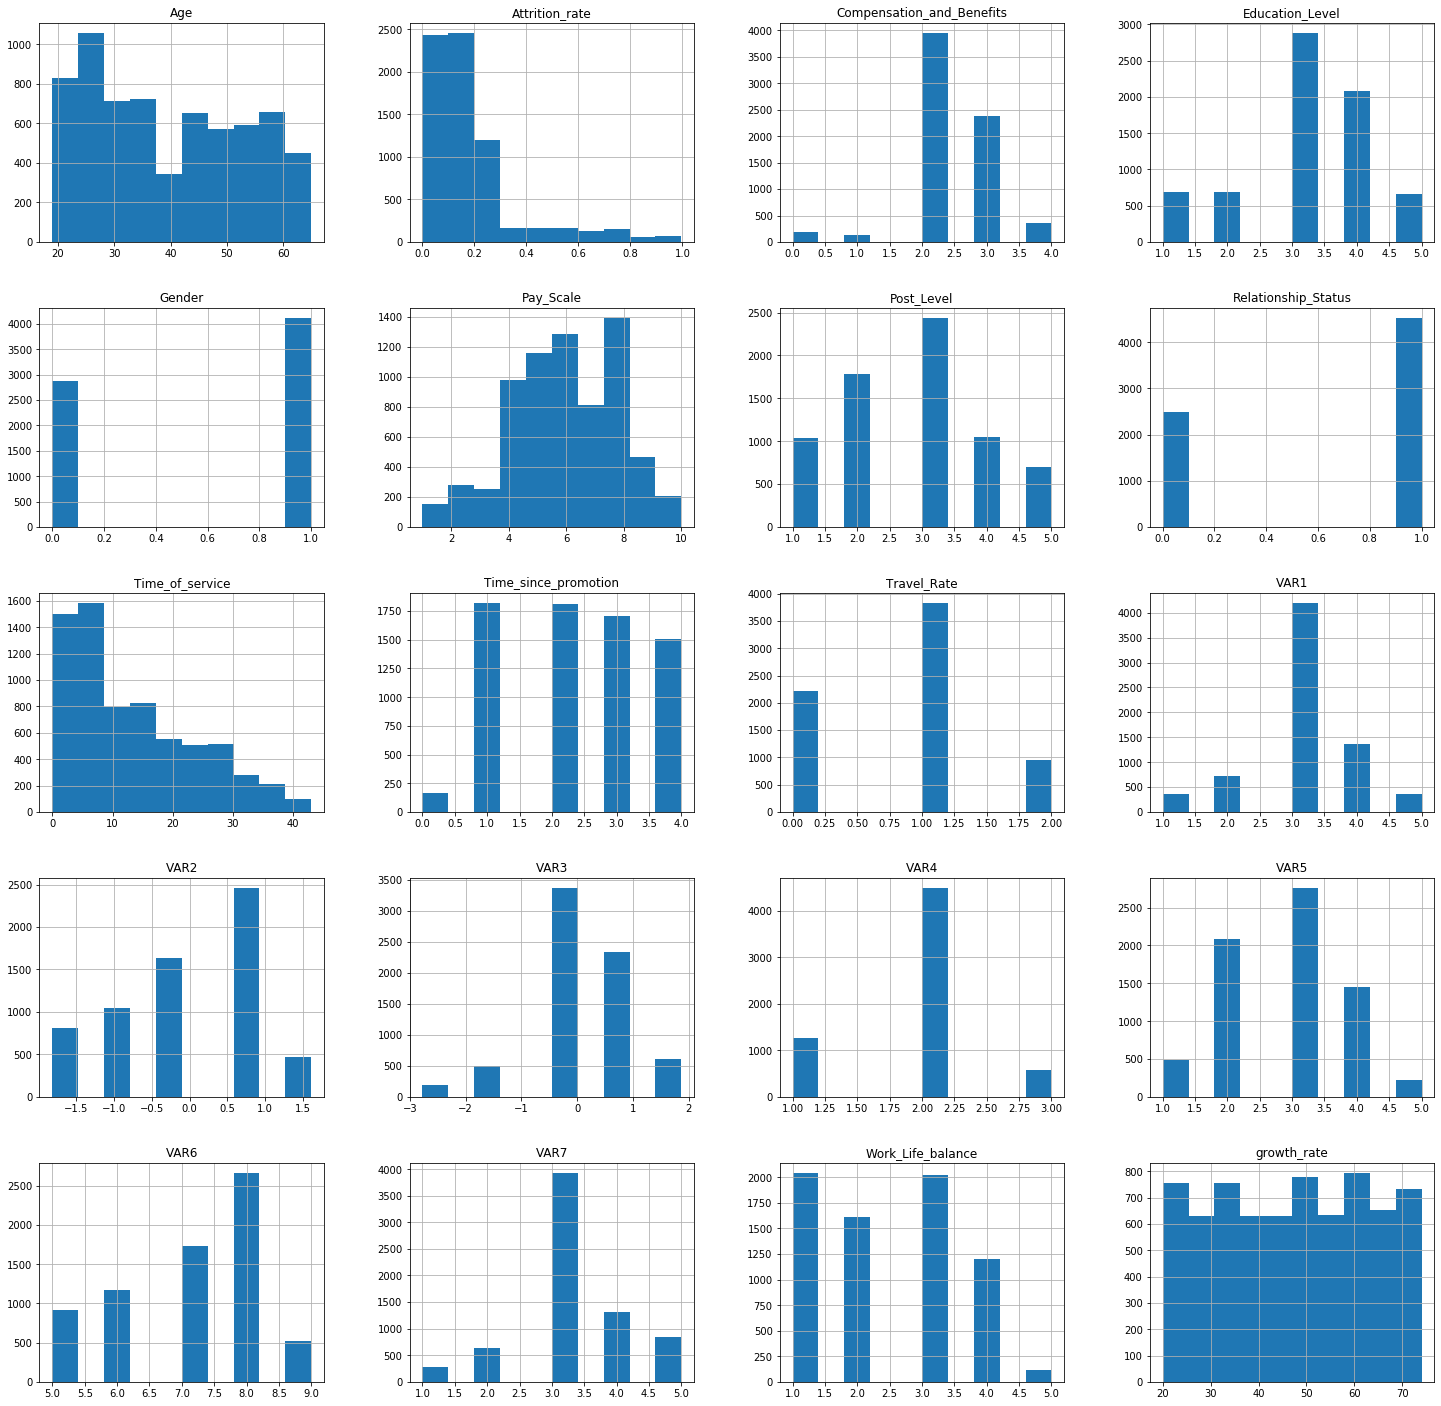

In [19]:
train.hist(figsize=(25,25))
plt.show()

In [30]:
train['VAR']=(1/7)*(train['VAR1']+train['VAR2']+train['VAR3']+train['VAR4']+train['VAR5']+train['VAR6']+train['VAR7'])
test['VAR']=(1/7)*(test['VAR1']+test['VAR2']+test['VAR3']+test['VAR4']+test['VAR5']+test['VAR6']+test['VAR7'])

del train['VAR1']
del train['VAR2']
del train['VAR3']
del train['VAR4']
del train['VAR5']
del train['VAR6']
del train['VAR7']
del test['VAR1']
del test['VAR2']
del test['VAR3']
del test['VAR4']
del test['VAR5']
del test['VAR6']
del test['VAR7']


In [31]:
# use pandas get_dummies function to generate one hot encoding for each categorical feature
DHometown=pd.get_dummies(test['Hometown'], prefix='Hometown')
# append the new feature to the existing set
test = pd.concat([test, DHometown], axis=1)
# use pandas get_dummies function to generate one hot encoding for each categorical feature
DUnit=pd.get_dummies(test['Unit'], prefix='Unit')
# append the new feature to the existing set
test = pd.concat([test, DUnit], axis=1)
# use pandas get_dummies function to generate one hot encoding for each categorical feature
DDecision_skill_possess=pd.get_dummies(test['Decision_skill_possess'], prefix='Decision_skill_possess')
# append the new feature to the existing set
test = pd.concat([test, DDecision_skill_possess], axis=1)


In [32]:
# use pandas get_dummies function to generate one hot encoding for each categorical feature
DHometown=pd.get_dummies(train['Hometown'], prefix='Hometown')
# append the new feature to the existing set
train = pd.concat([train, DHometown], axis=1)
# use pandas get_dummies function to generate one hot encoding for each categorical feature
DUnit=pd.get_dummies(train['Unit'], prefix='Unit')
# append the new feature to the existing set
train = pd.concat([train, DUnit], axis=1)
# use pandas get_dummies function to generate one hot encoding for each categorical feature
DDecision_skill_possess=pd.get_dummies(train['Decision_skill_possess'], prefix='Decision_skill_possess')
# append the new feature to the existing set
train = pd.concat([train, DDecision_skill_possess], axis=1)


In [33]:
del train['Unit']
del train['Hometown']
del train['Decision_skill_possess']

del test['Unit']
del test['Hometown']
del test['Decision_skill_possess']


In [34]:
train.head()

Gender  Age  Education_Level  Relationship_Status  Time_of_service  \
0       1   42                4                    1                4   
1       0   24                3                    0                5   
2       1   58                3                    1               27   
3       1   26                3                    0                4   
4       1   31                1                    1                5   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  ...  \
0                     4           33            1           1          7  ...   
1                     4           36            0           3          6  ...   
2                     3           51            0           2          8  ...   
3                     3           56            1           3          8  ...   
4                     4           62            1           3          2  ...   

   Unit_Production  Unit_Purchasing  Unit_Quality  Unit_R&D  Unit_Sales  \
0                0                0             0         0           0   
1                0                0             0         0           0   
2                0                0             1         0           0   
3                0                0             0         0           0   
4                0                0             0         0           0   

   Unit_Security  Decision_skill_possess_Analytical  \
0              0                                  0   
1              0                                  1   
2              0                                  0   
3              0                                  0   
4              0                                  0   

   Decision_skill_possess_Behavioral  Decision_skill_possess_Conceptual  \
0                                  0                                  1   
1                                  0                                  0   
2                                  0                                  1   
3                                  1                                  0   
4                                  0                                  1   

   Decision_skill_possess_Directive  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  

[5 rows x 35 columns]

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 35 columns):
Gender                               7000 non-null int64
Age                                  7000 non-null int64
Education_Level                      7000 non-null int64
Relationship_Status                  7000 non-null int64
Time_of_service                      7000 non-null int64
Time_since_promotion                 7000 non-null int64
growth_rate                          7000 non-null int64
Travel_Rate                          7000 non-null int64
Post_Level                           7000 non-null int64
Pay_Scale                            7000 non-null int64
Compensation_and_Benefits            7000 non-null int64
Work_Life_balance                    7000 non-null int64
Attrition_rate                       7000 non-null float64
VAR                                  7000 non-null float64
Hometown_Clinton                     7000 non-null uint8
Hometown_Franklin                 

In [37]:
train.VAR=train.VAR.astype(np.int64)

In [38]:
test.VAR=test.VAR.astype(np.int64)

In [43]:
train.corr()

Gender       Age  Education_Level  \
Gender                             1.000000 -0.001658         0.007127   
Age                               -0.001658  1.000000        -0.005546   
Education_Level                    0.007127 -0.005546         1.000000   
Relationship_Status                0.008817  0.002073         0.000529   
Time_of_service                    0.002828  0.840277        -0.010999   
Time_since_promotion               0.020346  0.141298        -0.002077   
growth_rate                        0.011666  0.001278         0.002991   
Travel_Rate                       -0.006566  0.011844        -0.017690   
Post_Level                        -0.003734  0.002128         0.009986   
Pay_Scale                          0.004958  0.012518         0.006830   
Compensation_and_Benefits         -0.004732 -0.012952         0.008854   
Work_Life_balance                  0.003546  0.003058        -0.015098   
Attrition_rate                    -0.028544 -0.015012        -0.008143   
VAR                               -0.008633  0.001446         0.007980   
Hometown_Clinton                  -0.000062 -0.011568        -0.005978   
Hometown_Franklin                 -0.018351  0.017267        -0.000360   
Hometown_Lebanon                  -0.014352  0.020007         0.016793   
Hometown_Springfield               0.000489 -0.021691        -0.010598   
Hometown_Washington                0.038183 -0.010245        -0.003593   
Unit_Accounting and Finance       -0.001704 -0.011250         0.021341   
Unit_Human Resource Management     0.021248 -0.000833         0.010162   
Unit_IT                           -0.020547  0.006854        -0.024476   
Unit_Logistics                    -0.012735  0.001839        -0.005515   
Unit_Marketing                     0.010846  0.023160         0.000919   
Unit_Operarions                    0.001035 -0.003767         0.017983   
Unit_Production                    0.020355 -0.017006        -0.001285   
Unit_Purchasing                   -0.001356 -0.002613         0.000166   
Unit_Quality                      -0.002533 -0.009856         0.008801   
Unit_R&D                           0.018966  0.001258        -0.016189   
Unit_Sales                        -0.009533  0.010374         0.002691   
Unit_Security                      0.010978 -0.013450         0.008456   
Decision_skill_possess_Analytical  0.004393 -0.029955         0.015879   
Decision_skill_possess_Behavioral -0.008919  0.013970         0.004311   
Decision_skill_possess_Conceptual  0.002660  0.005036        -0.016980   
Decision_skill_possess_Directive   0.001833  0.011003        -0.003193   

                                   Relationship_Status  Time_of_service  \
Gender                                        0.008817         0.002828   
Age                                           0.002073         0.840277   
Education_Level                               0.000529        -0.010999   
Relationship_Status                           1.000000        -0.000556   
Time_of_service                              -0.000556         1.000000   
Time_since_promotion                          0.005071         0.133179   
growth_rate                                  -0.008672         0.001008   
Travel_Rate                                  -0.004016         0.011379   
Post_Level                                   -0.015647        -0.005285   
Pay_Scale                                    -0.008336         0.017640   
Compensation_and_Benefits                    -0.021127        -0.012220   
Work_Life_balance                             0.005449        -0.001795   
Attrition_rate                               -0.009107        -0.008088   
VAR                                          -0.010455         0.002336   
Hometown_Clinton                              0.008960        -0.018761   
Hometown_Franklin                             0.005485         0.013046   
Hometown_Lebanon                             -0.023318         0.025866   
Hometown_Springfield  

In [44]:
X_train= train.drop(['Attrition_rate'], axis =1)
y_train= train['Attrition_rate']

X_test=test.drop('Employee_ID', axis=1).copy()
X_test.shape

(3000, 34)

In [48]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [49]:
preds

array([0.3107884 , 0.15360123, 0.1817277 , ..., 0.16177818, 0.21221843,
       0.23179403], dtype=float32)

In [50]:
submission = pd.DataFrame({
        'Employee_ID': test['Employee_ID'],
        'Attrition_rate': preds
    })
submission.to_csv('submission.csv', index=False)